In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('wine_sales_data.csv')

#df.isnull().sum()
df.columns
#df.country.unique()
#pd.Series(df.country.unique()).count()
#df.describe()

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [90]:
world = df.drop(['winery', 'description', 'region_1', 'region_2', 'Unnamed: 0'], axis = 1)
world.columns

Index(['country', 'designation', 'points', 'price', 'province', 'variety'], dtype='object')

In [91]:
world = world.dropna(subset=['price', 'country'])
world.count()

country        137230
designation     94919
points         137230
price          137230
province       137230
variety        137230
dtype: int64

In [92]:
world.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India',
       'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'US-France'], dtype=object)

In [93]:
#world[world['country'] == 'Portugal'].count()
#world[world['country'] == 'Portugal'].province.unique()

france = world[world['country'] == 'France']
germany = world[world['country'] == 'Germany']
italy = world[world['country'] == 'Italy']
portugal = world[world['country'] == 'Portugal']
spain = world[world['country'] == 'Spain']
south_africa = world[world['country'] == 'South Africa']
usa = world[world['country'] == 'US']
region_vv = world[world['province'] == 'Vinho Verde']
#portugal = pd.DataFrame(portugal)

,points,price
count,8160.000000,8160.000000
mean,86.638725,27.048529
std,3.128904,33.861666
min,80.000000,4.000000
25%,84.000000,12.000000
50%,87.000000,17.000000
75%,89.000000,28.000000
max,98.000000,770.000000


In [115]:
france.describe()

,points,price
count,14785.000000,14785.000000
mean,88.603314,45.619885
std,3.142284,69.697060
min,80.000000,5.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,50.000000
max,100.000000,2300.000000


In [120]:
germany.describe()

,points,price
count,2347.000000,2347.000000
mean,88.610567,39.011078
std,2.916430,56.857128
min,80.000000,5.000000
25%,87.000000,18.000000
50%,89.000000,24.000000
75%,90.000000,40.000000
max,97.000000,775.000000


In [116]:
portugal.describe()

,points,price
count,4176.000000,4176.000000
mean,88.176724,26.332615
std,2.929330,35.242873
min,80.000000,4.000000
25%,86.000000,11.000000
50%,88.000000,17.000000
75%,90.000000,29.000000
max,99.000000,980.000000


In [117]:
spain.describe()

,points,price
count,8160.000000,8160.000000
mean,86.638725,27.048529
std,3.128904,33.861666
min,80.000000,4.000000
25%,84.000000,12.000000
50%,87.000000,17.000000
75%,89.000000,28.000000
max,98.000000,770.000000


In [118]:
italy.describe()

,points,price
count,18784.000000,18784.000000
mean,88.445006,37.547913
std,2.754785,37.067869
min,80.000000,5.000000
25%,87.000000,17.000000
50%,88.000000,25.000000
75%,90.000000,48.000000
max,100.000000,900.000000


In [119]:
south_africa.describe()

,points,price
count,2237.000000,2237.000000
mean,87.211444,21.130532
std,2.394368,14.248025
min,80.000000,5.000000
25%,86.000000,12.000000
50%,87.000000,16.000000
75%,89.000000,25.000000
max,95.000000,145.000000


In [121]:
usa.describe()

,points,price
count,62139.000000,62139.000000
mean,87.817200,33.653808
std,3.410174,24.891343
min,80.000000,4.000000
25%,85.000000,19.000000
50%,88.000000,28.000000
75%,90.000000,41.000000
max,100.000000,2013.000000


In [94]:
#portugal.designation.unique().tolist()

In [95]:
#pd.Series(region_vv.designation.unique()).count()

In [96]:
#pd.Series(world.designation.unique()).count()

In [97]:
comp_countries = ['france', 'germany', 'italy', 'portugal', 'spain', 'south_africa', 'usa', 'region_vv']
#comp_countries = np.array(comp_countries)

In [98]:
X = 'X_'
y = 'y_'
X_list = []
y_list = []
for i in comp_countries:
    X_name = X+i
    X_list.append(X_name)
    y_name = y+i
    y_list.append(y_name)

In [101]:
france_dummies = pd.get_dummies(france)
france_dummies

,points,price,country_France,designation_1 C,designation_1 er Cru Charmes,designation_1 er Cru Les Champs Gains,designation_101 Rangs,designation_1834 Brut Rosé,designation_1834 Cuvée Spéciale Brut,designation_1844 Réserve,...,variety_Sémillon,variety_Tannat,variety_Tannat-Cabernet,variety_Tannat-Cabernet Franc,variety_Tannat-Merlot,variety_Tokay Pinot Gris,variety_Ugni Blanc-Colombard,variety_Vermentino,variety_Viognier,variety_White Blend
4,95,66.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,95,90.0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
18,95,290.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,90,22.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,90,60.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150921,91,38.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150923,91,30.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150924,91,70.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150926,91,27.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X_france = france_dummies.drop(['price'], axis = 1)
y_france = france_dummies['price']
y_france = np.array(y_france)

# Scaling
#X_scaled_world = StandardScaler().fit_transform(X_world)
X_train_france, X_test_france, y_train_france, y_test_france = train_test_split(X_france, y_france, test_size = 0.3, random_state = 1)

In [103]:
# Logistic Regression
model_lr_france = LogisticRegression().fit(X_train_france, y_train_france)
model_lr_prediction_france = model_lr_france.predict(X_test_france)
version_lr_france = accuracy_score(y_test_france, model_lr_prediction_france)
version_lr_france

0.07146077547339946

In [106]:
kappa_lr_france = cohen_kappa_score(y_test_france, model_lr_prediction_france)
kappa_lr_france

0.03453340381340586

In [107]:
# Decision Tree
model_dt_france = tree.DecisionTreeClassifier().fit(X_train_france, y_train_france)
model_dt_prediction_france = model_dt_france.predict(X_test_france)
version_dt_france = accuracy_score(y_test_france, model_dt_prediction_france)
version_dt_france

0.3518935978358882

In [108]:
kappa_dt_france = cohen_kappa_score(y_test_france, model_dt_prediction_france)
kappa_dt_france

0.3349617345528718

Maximum:  0.09742895805142084
Mean:  0.08251634749368927


<AxesSubplot:>

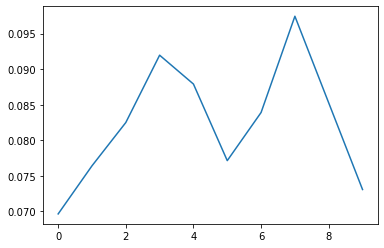

In [110]:
# K-Fold DecisionTree
dt_plot_france = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X_france, y_france, cv=10)
print('Maximum: ', dt_plot_france.max())
#cvs_dt = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X, y, cv=10).mean()
print('Mean: ', dt_plot_france.mean())
dt_plot_france = pd.Series(dt_plot_france)
dt_plot_france.plot()

In [112]:
# KNN
model_knn_france = KNeighborsClassifier(n_neighbors = 15, metric = 'minkowski', p = 2).fit(X_train_france, y_train_france)
model_knn_prediction_france = model_knn_france.predict(X_test_france)
knn_france = accuracy_score(y_test_france, model_knn_prediction_france)
knn_france

0.11519386834986474

In [113]:
kappa_knn_france = cohen_kappa_score(y_test_france, model_knn_prediction_france)
kappa_knn_france

0.09087985085903616

In [114]:
# SVM
model_svm_france = SVC(kernel='linear').fit(X_train_france, y_train_france)
model_svm_prediction_france = model_svm_france.predict(X_test_france)
svm_france = accuracy_score(y_test_france, model_svm_prediction_france)
svm_france

NameError: name 'model_svm' is not defined

In [ ]:
kappa_svm_france = cohen_kappa_score(y_test_france, model_svm_prediction_france)
kappa_svm_france

In [ ]:
model_svm2_france = SVC(kernel='poly').fit(X_train_france, y_train_france)
model_svm2_prediction_france = model_svm2_france.predict(X_test_france)
svm2_france = accuracy_score(y_test_france, model_svm2_prediction_france)
svm2_france

In [ ]:
kappa_svm2_france = cohen_kappa_score(y_test_france, model_svm2_prediction_france)
kappa_svm2_france

In [ ]:
model_svm3_france = SVC(kernel='rbf').fit(X_train_france, y_train_france)
model_svm3_prediction_france = model_svm3_france.predict(X_test_france)
svm3_france = accuracy_score(y_test_france, model_svm3_prediction_france)
svm3_france

In [ ]:
print(classification_report(y_test_france,model_svm3_prediction_france, target_names=['White Wine', 'Red Wine']))